In [1]:
import time
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

# Settings

In [2]:
meta_dir = "C:\\Users\\alexandr.pankratov\\Desktop\\диплом\\Rk smooth meta"
data_dir = 'D:\\math\\res12.04.2019T06_56_23'
fourier_dir = "D:\\rk smooth fourier"

def set_lineplot():
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['grid.color'] = 'gray'  
    plt.rcParams['axes.grid'] = True
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['font.size'] = 24

def set_heatmap():
    plt.rcParams['font.size'] = 24
    plt.rcParams['figure.figsize'] = [20, 10]

# Code

In [23]:
class Result:
    def __init__(self,_id):
        onlyfiles = [os.path.join(meta_dir, f) for f in os.listdir(meta_dir) if os.path.isfile(os.path.join(meta_dir, f))]
        path_to_meta = next(filter(lambda x: _id in x and '_meta' in x,onlyfiles))
        with open(path_to_meta,'r') as f:
            lines = f.readlines()
            self.meta = json.loads(lines[0])
            self.end_u = np.fromstring(lines[1][1:-2],sep=',',dtype=np.float)
            self.end_v = np.fromstring(lines[2][1:-2],sep=',',dtype=np.float)
            self.start_u = np.array(self.meta['InitStateU'],dtype = np.float)
            del self.meta['InitStateU']
            self.start_v = np.array(self.meta['InitStateV'],dtype = np.float)
            del self.meta['InitStateV']
            self.meta['TimeLineQuant']*=self.meta['TimeQuant']
            self.space_net = np.fromiter([i * self.meta['SpaceQuant'] for i in range(0,int(self.meta['SpaceRange']/self.meta['SpaceQuant']))],dtype=np.float)
    def draw_end_u(self):
        set_lineplot()
        sns.lineplot(self.space_net, self.end_u)
    def draw_start_u(self):
        set_lineplot()
        sns.lineplot(self.space_net, self.start_u)
    def draw_end_v(self):
        set_lineplot()
        sns.lineplot(self.space_net, self.end_v)
    def draw_start_v(self):
        set_lineplot()
        sns.lineplot(self.space_net, self.start_v)
    def draw_heatmap(self,start, end, cmap = "cividis"):
        set_heatmap()
        start_scaled = int(start/self.meta['TimeLineQuant'])
        end_scaled = int(end/self.meta['TimeLineQuant'])
        onlyfiles = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
        path_to_data = next(filter(lambda x: str(self.meta['Id']) in x and '_data' in x,onlyfiles))
        print(path_to_data)
        data = pd.read_csv(path_to_data,sep=';',dtype=np.float).iloc[start_scaled:end_scaled]
        pic = sns.heatmap(data.transpose(),yticklabels=False,cmap=cmap,cbar_kws = dict(use_gridspec=False,location="top"))
        pic.xticks =[]
        pic.set_xlim(start_scaled,end_scaled)
        plt.show()
    def draw_fourier(self,start,end):
        set_lineplot()
        start_scaled = int(start/self.meta['TimeLineQuant'])
        end_scaled = int(end/self.meta['TimeLineQuant'])
        onlyfiles = [os.path.join(fourier_dir, f) for f in os.listdir(fourier_dir) if os.path.isfile(os.path.join(fourier_dir, f))]
        path_to_data = next(filter(lambda x: str(self.meta['Id']) in x and '_Fourier' in x,onlyfiles))
        
        data = pd.read_csv(path_to_data,sep=' ',dtype=float).iloc[start_scaled:end_scaled]
        
        pic = data.drop(data.columns.values[-1],axis=1).plot.line(color = sns.color_palette("colorblind",len(data)),legend=False)
        #pic.legend(loc=9, bbox_to_anchor=(0.6,0.5))
        pic.set_xlim(start_scaled,end_scaled)
        plt.show()

In [24]:
a = Result(os.path.join(meta_dir,'-1794604861'))

In [25]:
print(a.meta)

{'Id': -1794604861, 'Du': 21.5, 'Dv': 1.0, 'p': 2.0, 'q': 2.0, 'SpaceQuant': 0.2, 'SpaceRange': 40.0, 'TimeQuant': 0.00025, 'NoiseAmp': 0.0, 'ItersNum': 8000000, 'InitStateConfig': {'ProfileType': 2, 'Avg': 1.0, 'Amp': 0.5, 'Picks': 2.0, 'Integrator': 1}, 'TimeLineQuant': 0.1}


D:\math\res12.04.2019T06_56_23\-1794604861; 2019-04-12T11_35_03_209_data


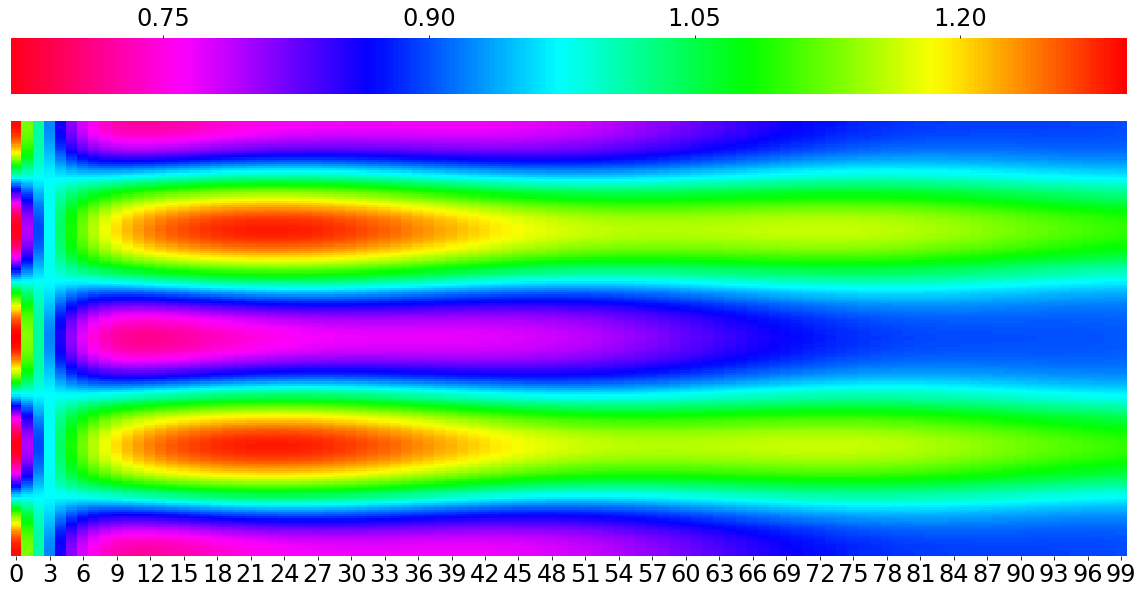

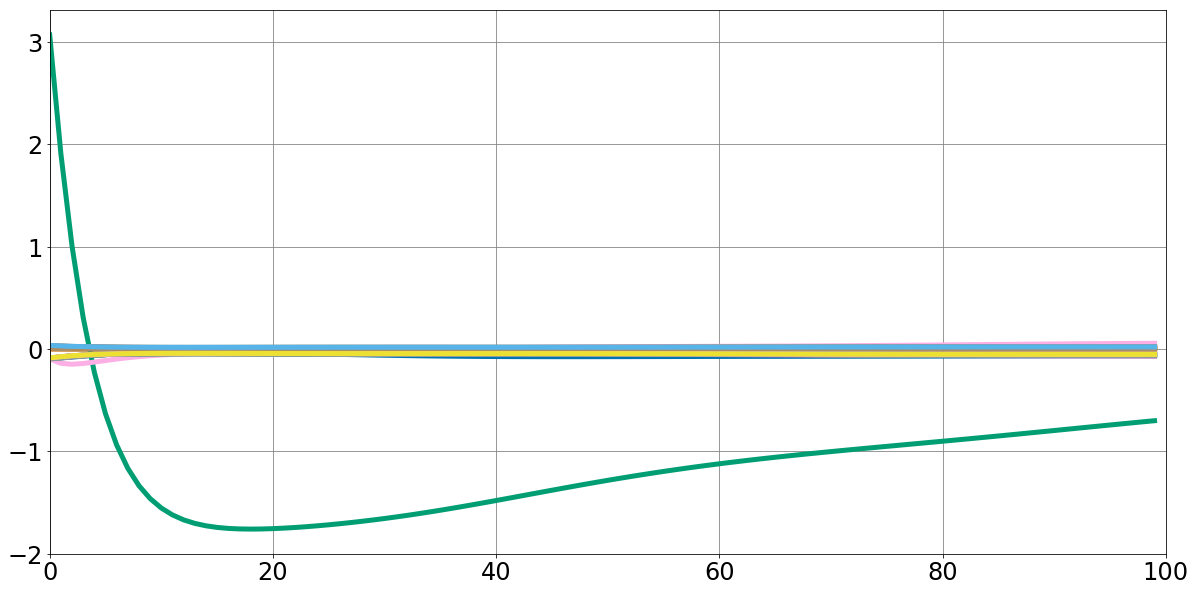

D:\math\res12.04.2019T06_56_23\-1794604861; 2019-04-12T11_35_03_209_data


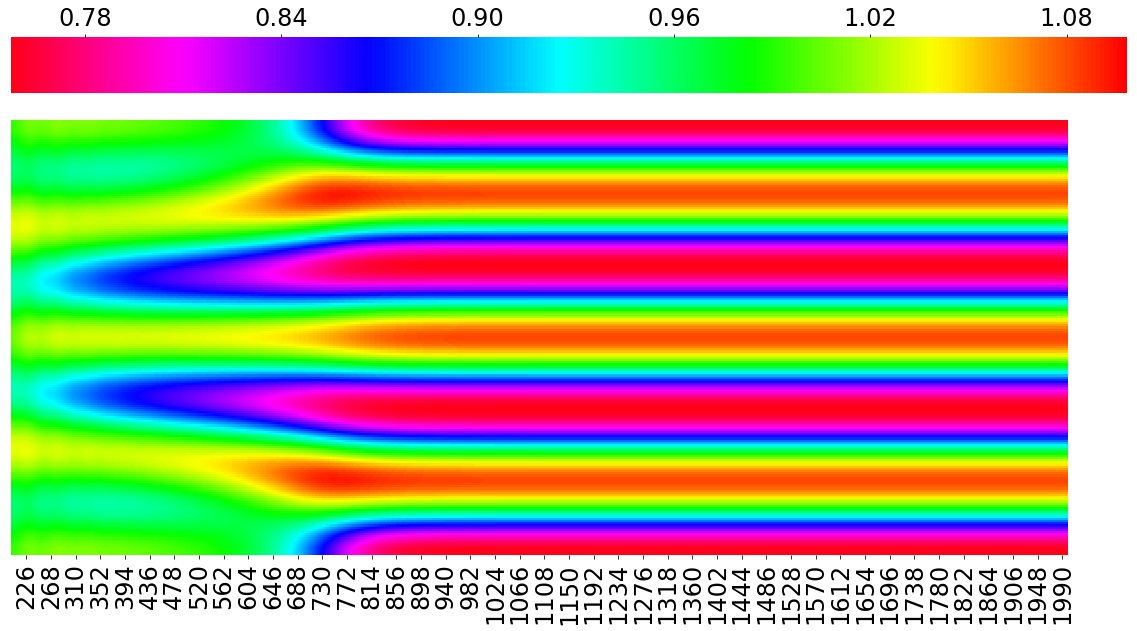

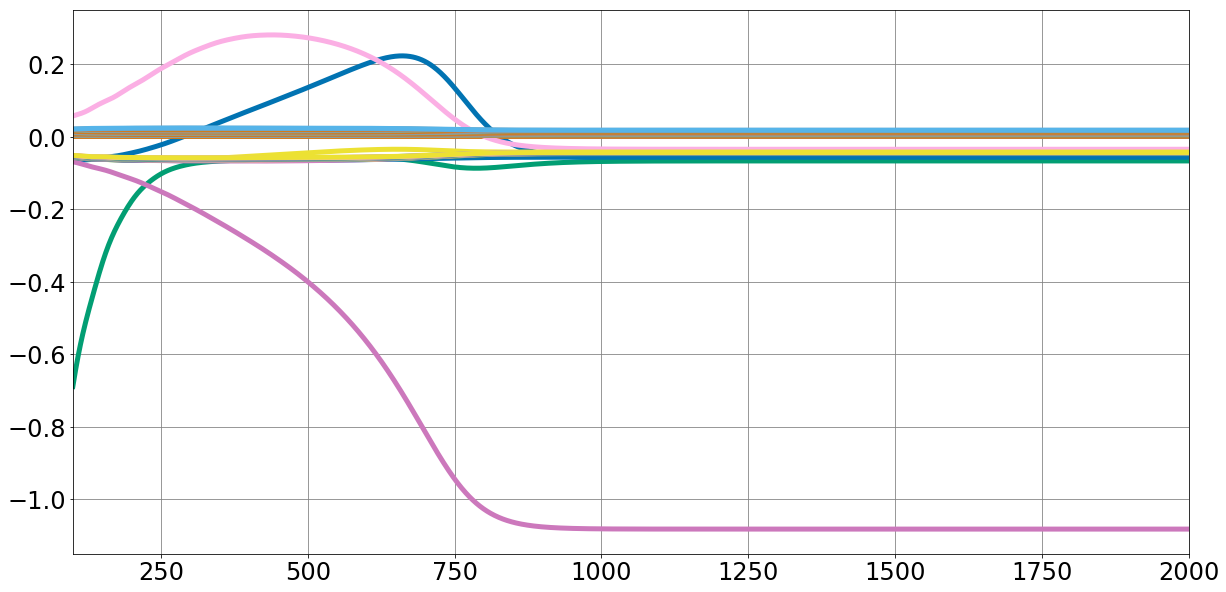

D:\math\res12.04.2019T06_56_23\-1794604861; 2019-04-12T11_35_03_209_data


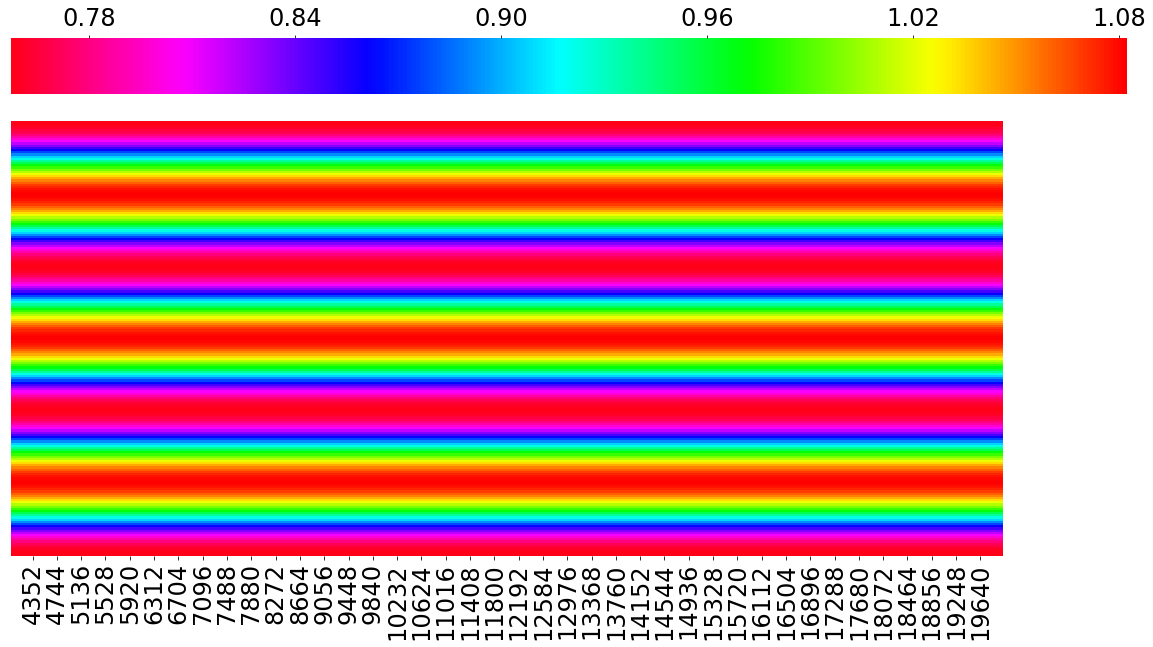

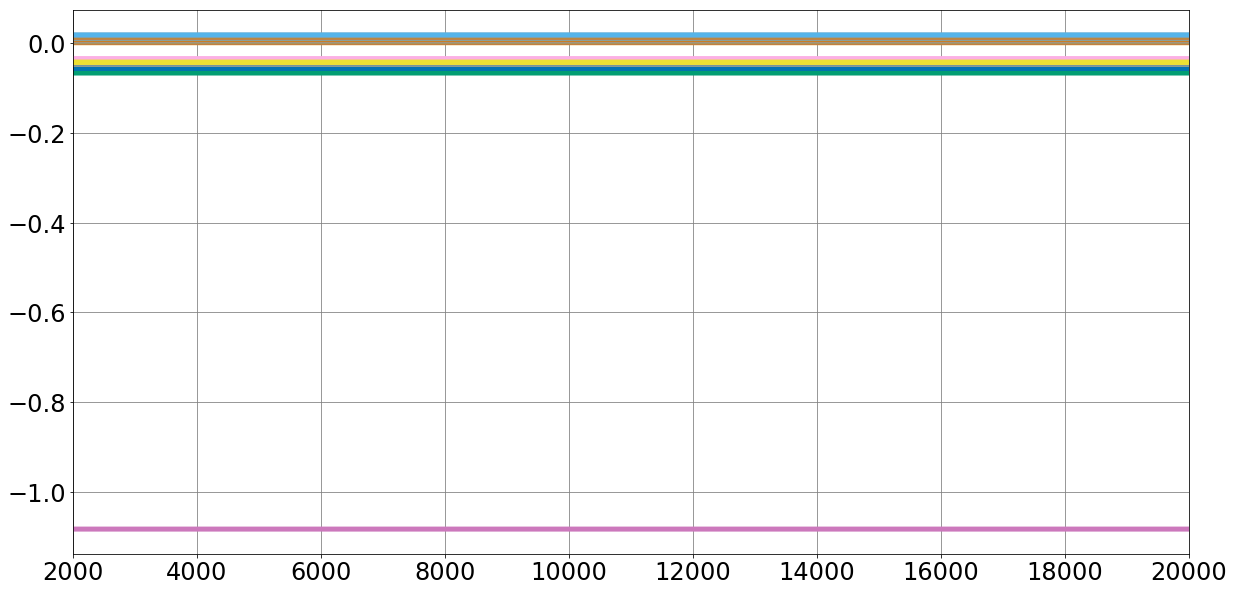

In [26]:
a.draw_heatmap(0,10,"hsv_r")
a.draw_fourier(0,10)
a.draw_heatmap(10,200,"hsv_r")
a.draw_fourier(10,200)
a.draw_heatmap(200,2000,"hsv_r")
a.draw_fourier(200,2000)

D:\math\res12.04.2019T06_56_23\-1204869459; 2019-04-13T01_29_33_196_data


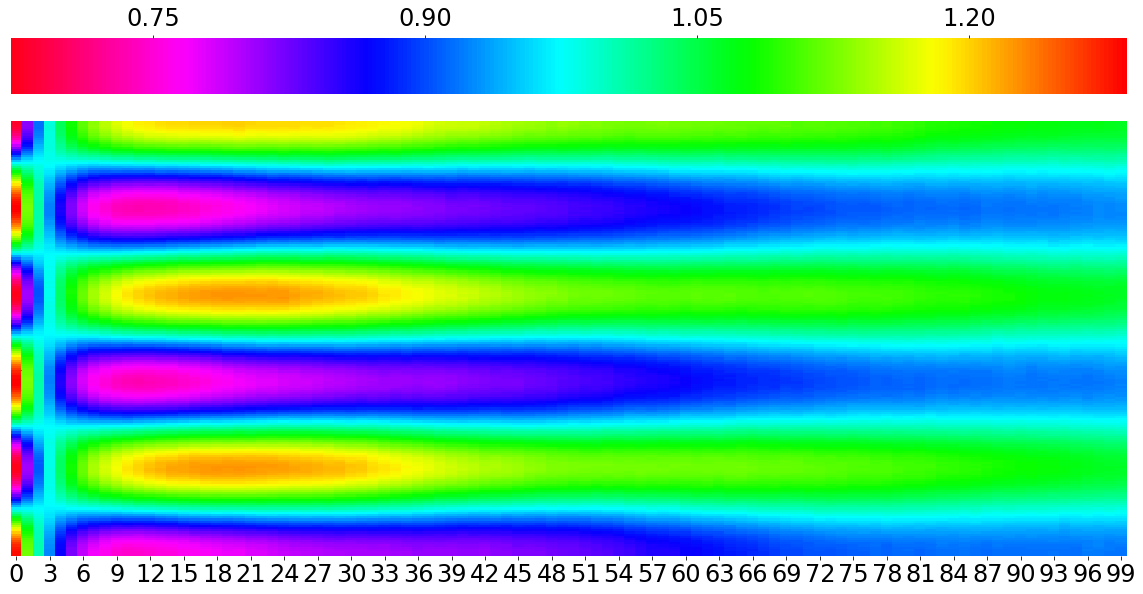

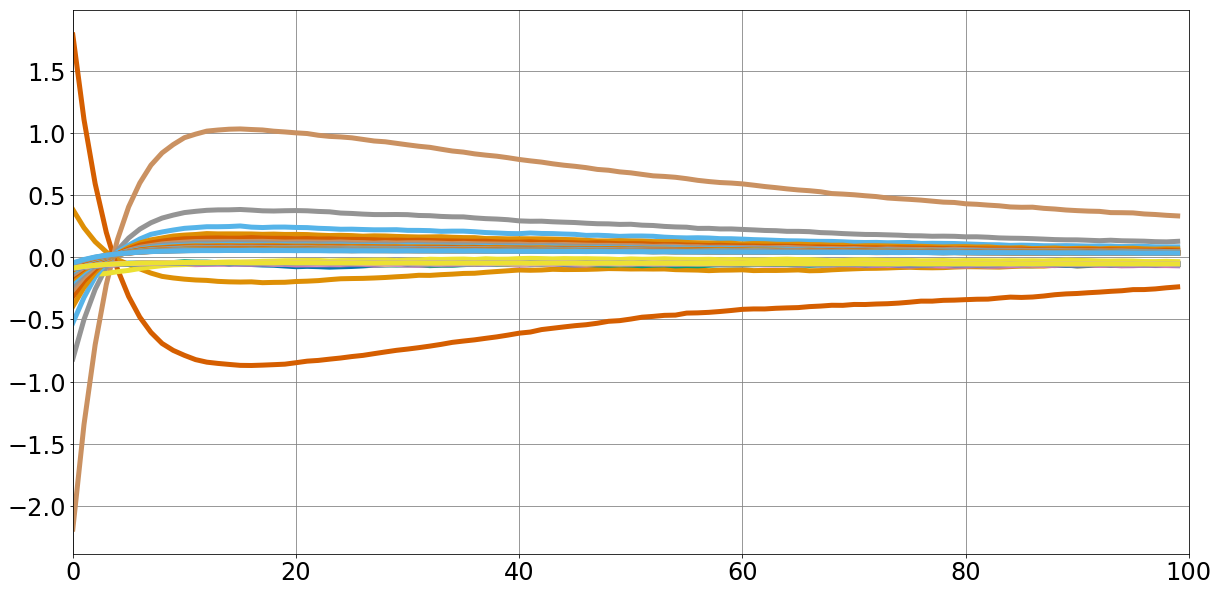

D:\math\res12.04.2019T06_56_23\-1204869459; 2019-04-13T01_29_33_196_data


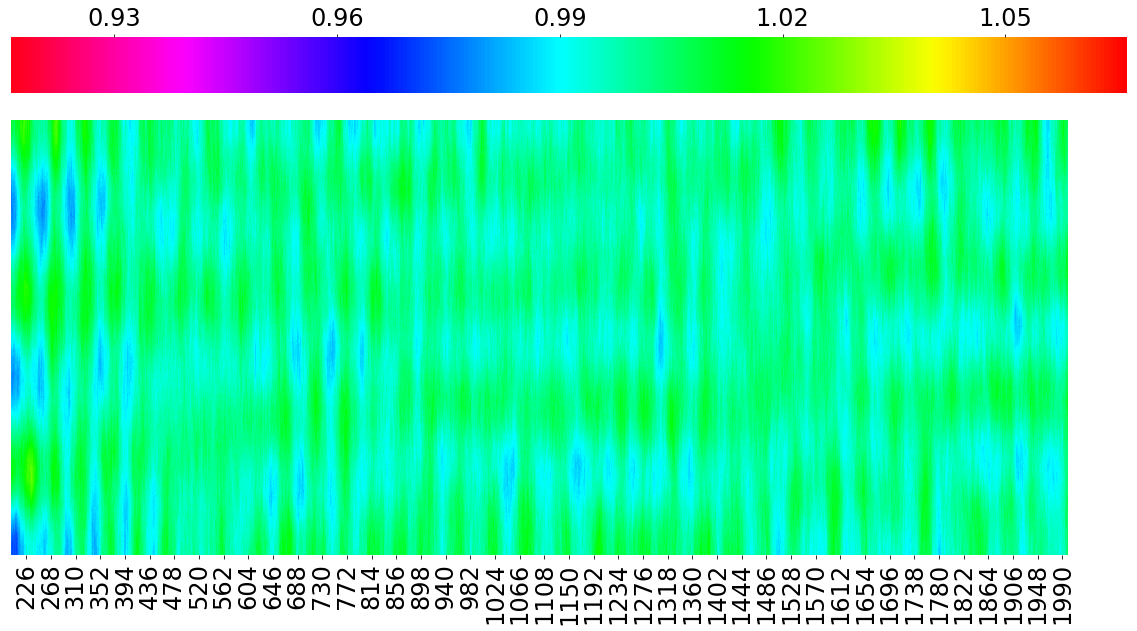

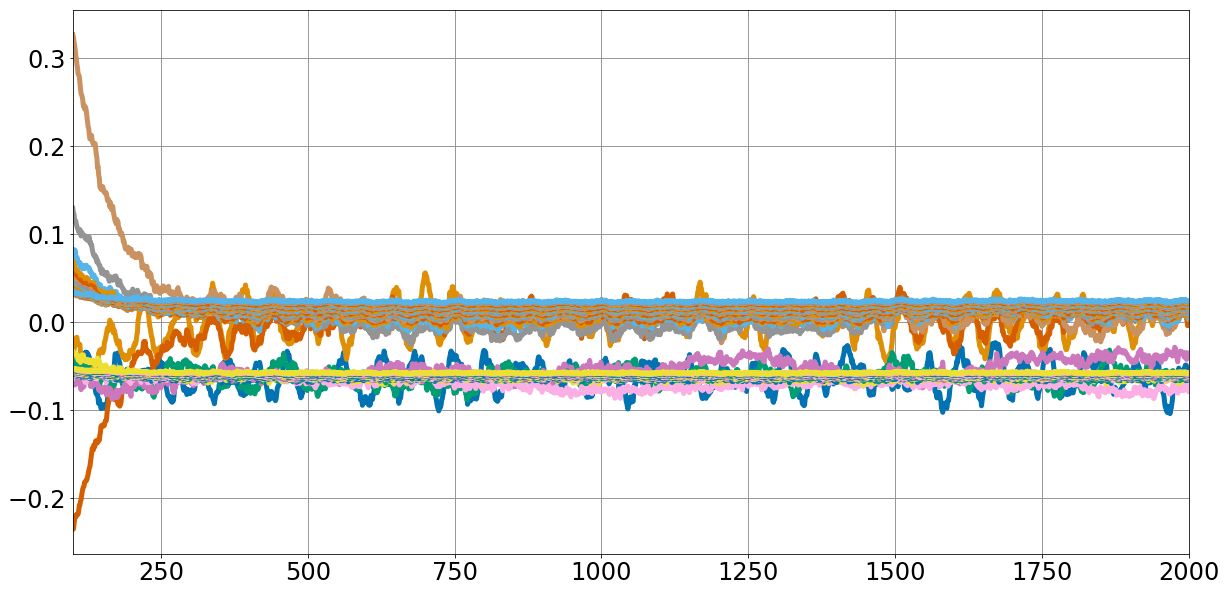

D:\math\res12.04.2019T06_56_23\-1204869459; 2019-04-13T01_29_33_196_data


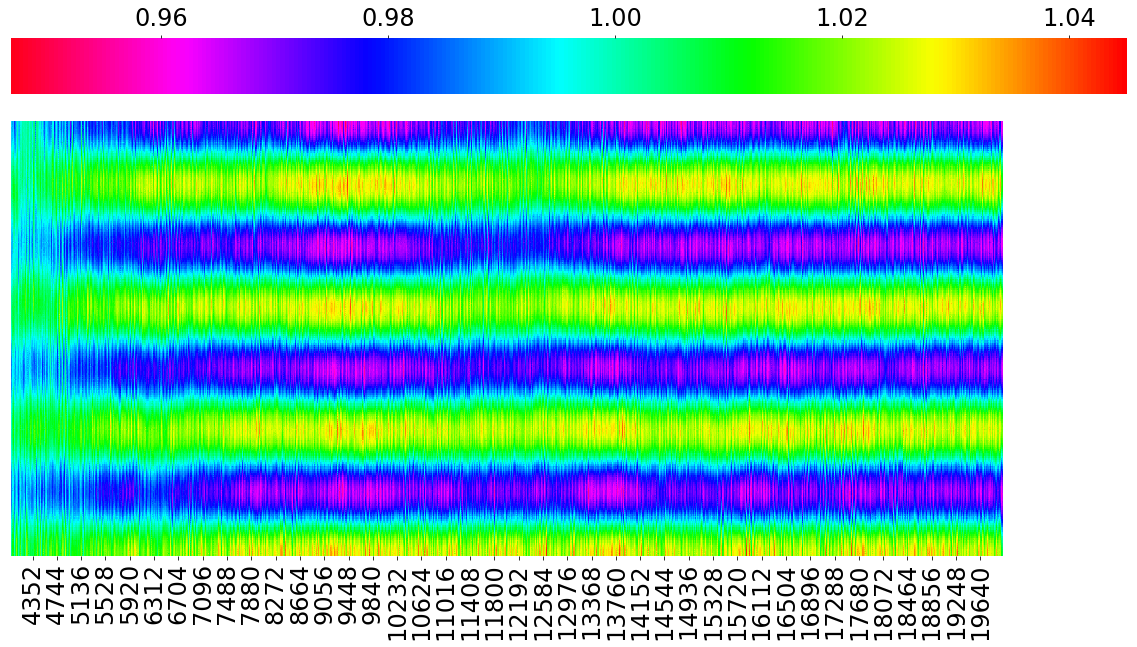

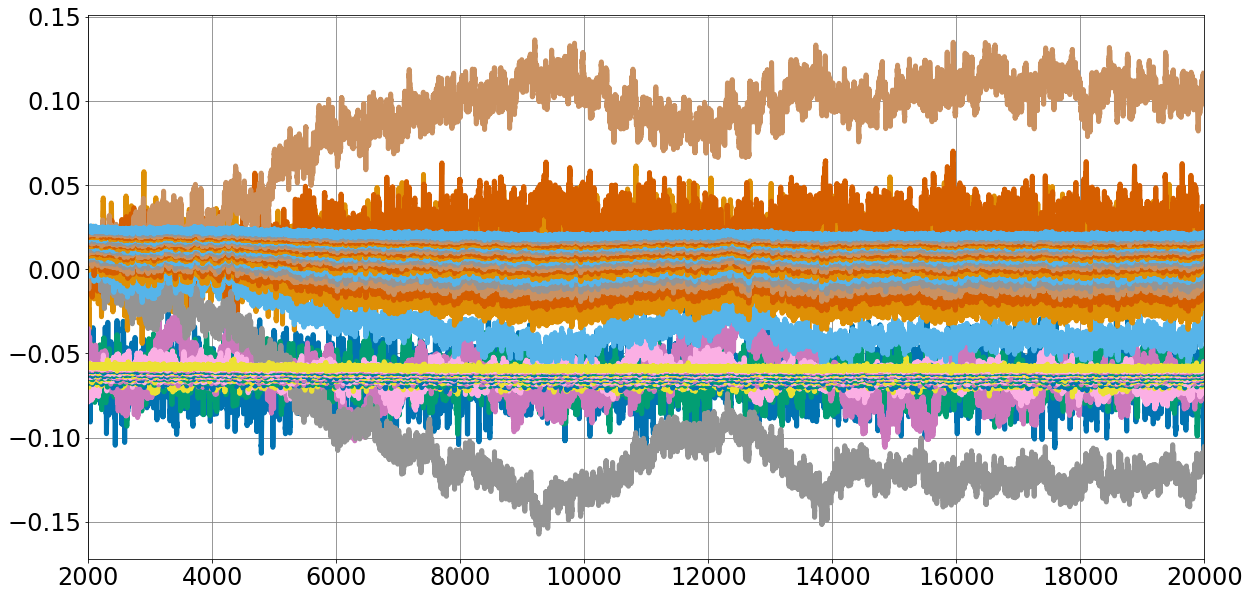

In [28]:
d = Result(os.path.join(meta_dir,'-1204869459'))
print(d.meta)
d.draw_heatmap(0,10,"hsv_r")
d.draw_fourier(0,10)
d.draw_heatmap(10,200,"hsv_r")
d.draw_fourier(10,200)
d.draw_heatmap(200,2000,"hsv_r")
d.draw_fourier(200,2000)

{'Id': -628665259, 'Du': 18.5, 'Dv': 1.0, 'p': 2.0, 'q': 2.0, 'SpaceQuant': 0.2, 'SpaceRange': 40.0, 'TimeQuant': 0.001, 'NoiseAmp': 0.0005, 'ItersNum': 2000000, 'InitStateConfig': {'ProfileType': 3, 'Avg': 1.0, 'Amp': 0.5, 'Picks': 6.5, 'Integrator': 1}, 'TimeLineQuant': 0.1}
D:\math\res12.04.2019T06_56_23\-628665259; 2019-04-13T12_26_26_779_data


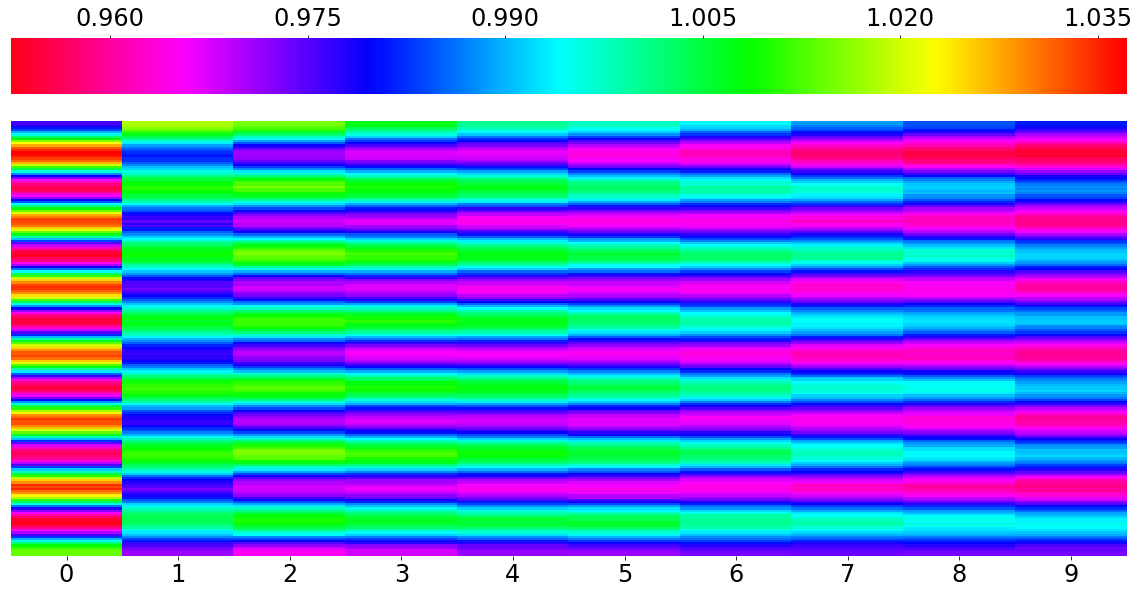

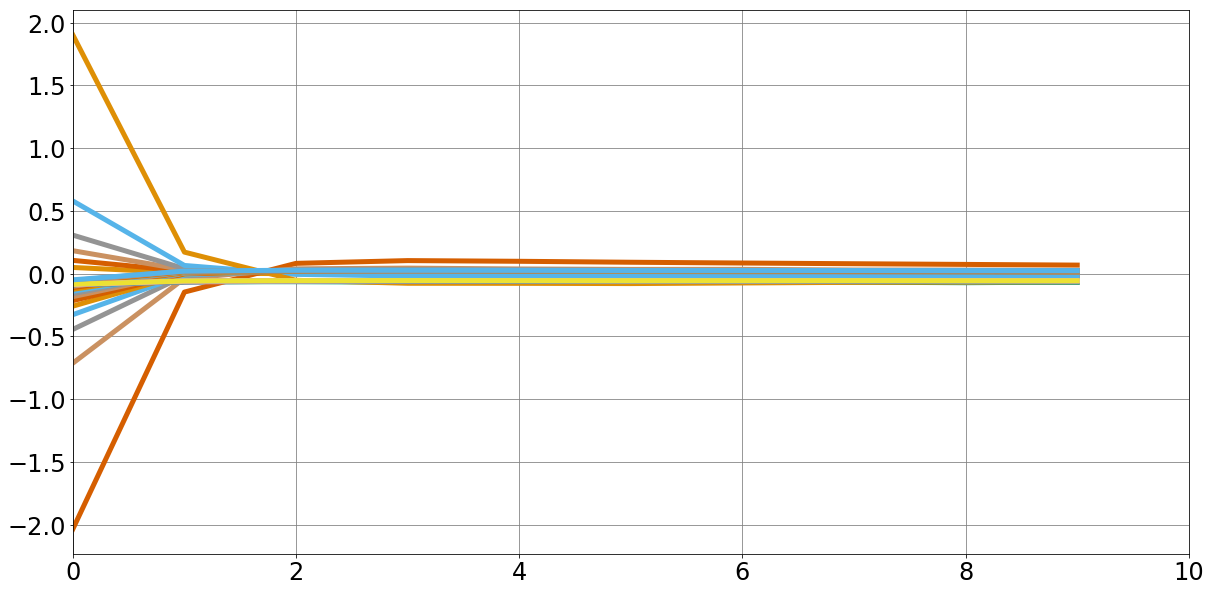

D:\math\res12.04.2019T06_56_23\-628665259; 2019-04-13T12_26_26_779_data


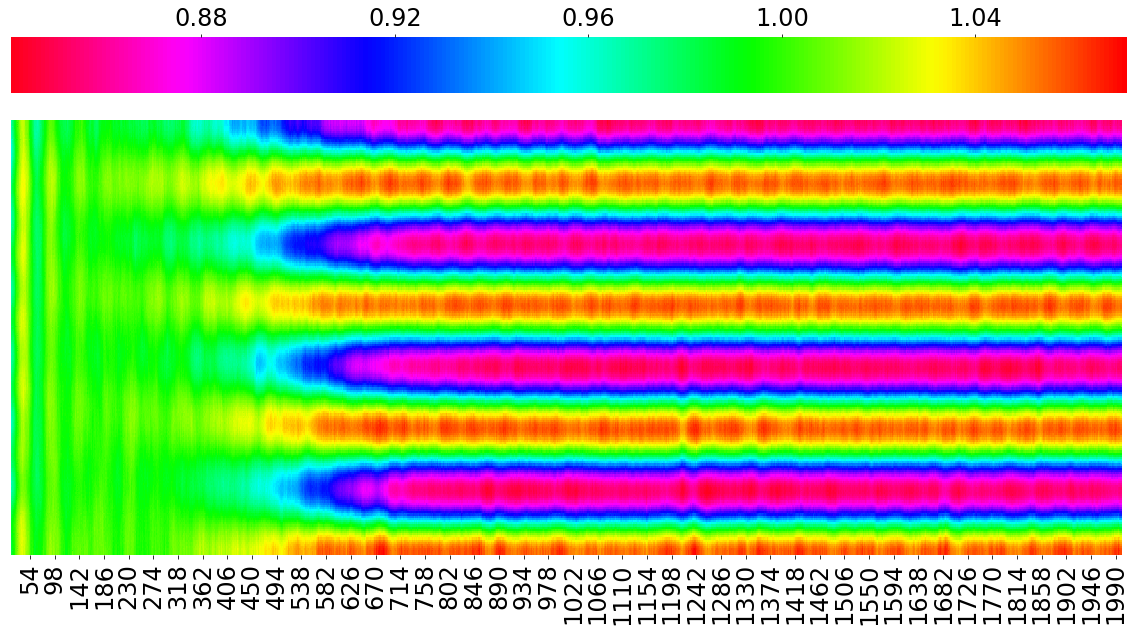

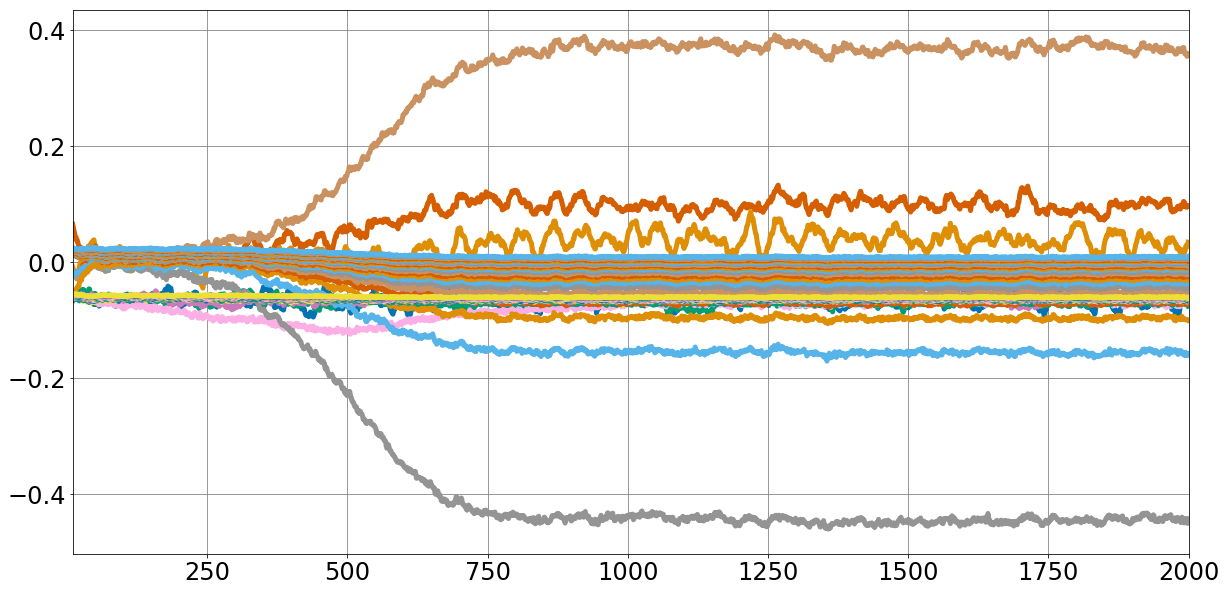

D:\math\res12.04.2019T06_56_23\-628665259; 2019-04-13T12_26_26_779_data


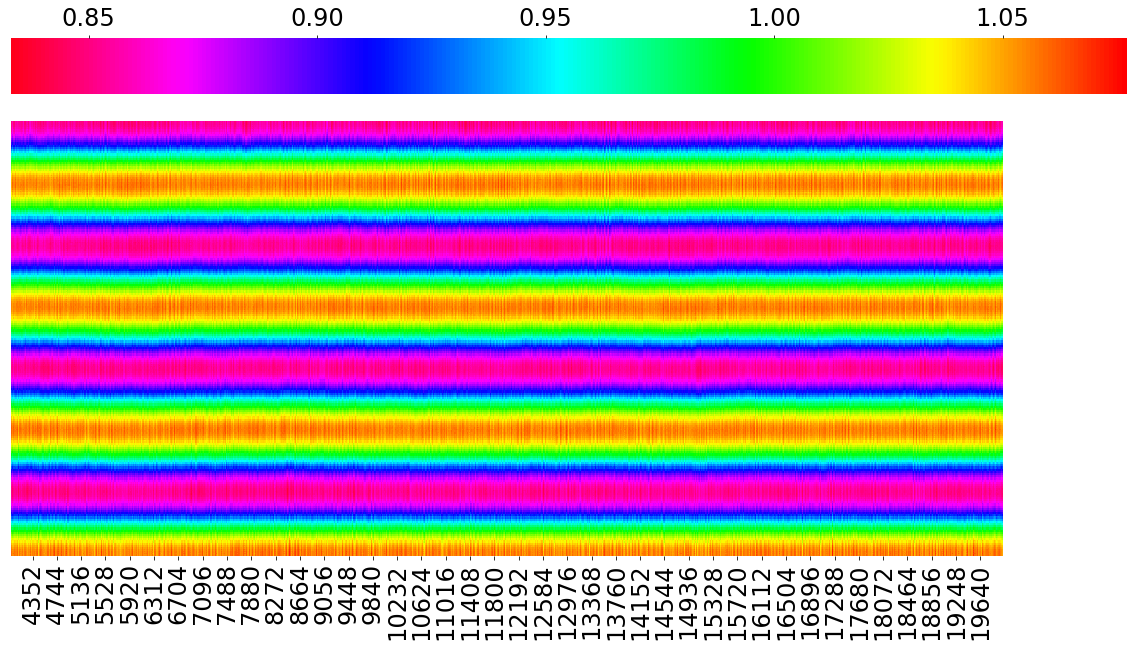

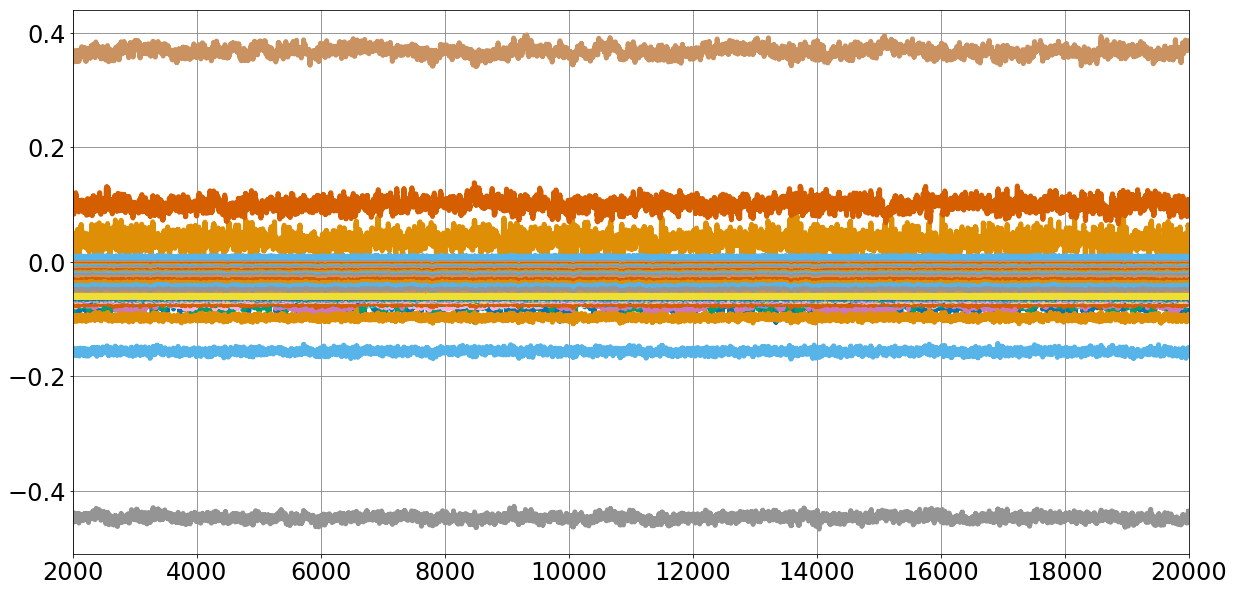

In [30]:
d = Result(os.path.join(meta_dir,'-628665259'))
print(d.meta)
d.draw_heatmap(0,1,"hsv_r")
d.draw_fourier(0,1)
d.draw_heatmap(1,200,"hsv_r")
d.draw_fourier(1,200)
d.draw_heatmap(200,2000,"hsv_r")
d.draw_fourier(200,2000)